## House Price Prediction

Importing Standard Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings('ignore')
from IPython import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Importing the data set

In [3]:
df=pd.read_csv('houseprice.csv')

Basic audits of the dataset

In [4]:
#looking into the first 5 values of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# detailed info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Checking for inconsistent columns

In [6]:
#Dropping Id column as this will not make any sense in our prediction
df.drop(['Id'],axis=1,inplace=True)

Finding and handling the missing values

In [7]:
#gives total number of null values in each and every columns
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
#Droping the columns that has more number of values missed
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

Imputing Missing values

In [9]:
#Imputing the misseing values using median for numeric variables and mode for categorical variables
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [10]:
df.isna().sum()

#now we can see all the null values are filled and the sum of null values in each variable is zero

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

#### Univariate analysis

In [11]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
#pairplot for checking things like linearity,etc.,
sns.pairplot(df)

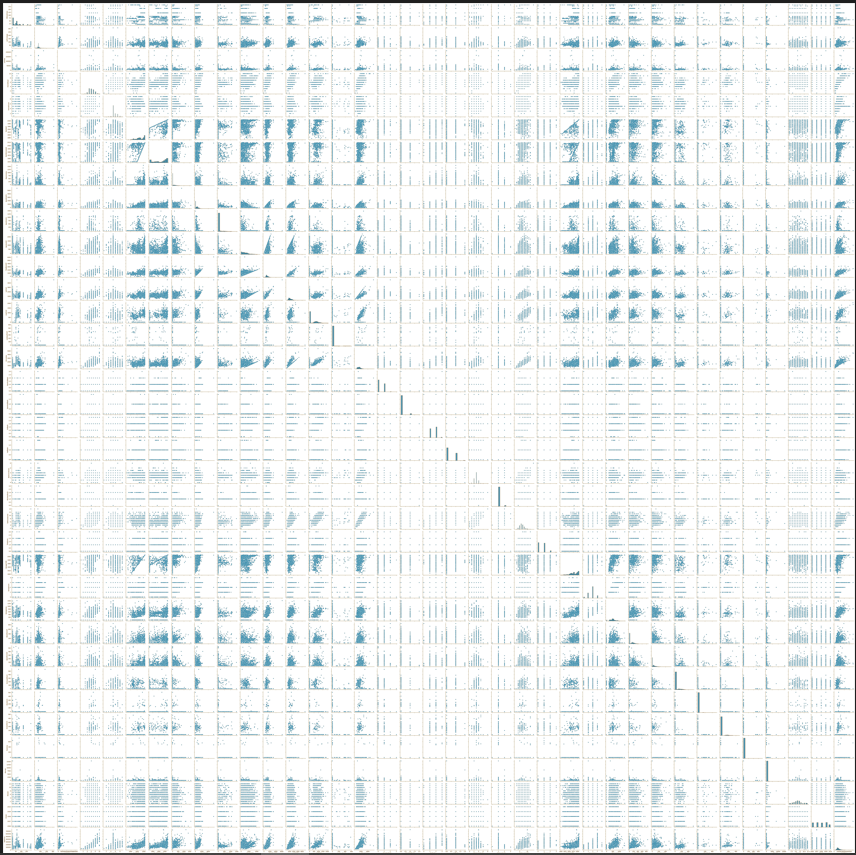

#### Bi-variate Analysis for continues variables

In [13]:
plt.figure(figsize=(29,29))
sns.heatmap(df.corr(),annot=True)
plt.show()

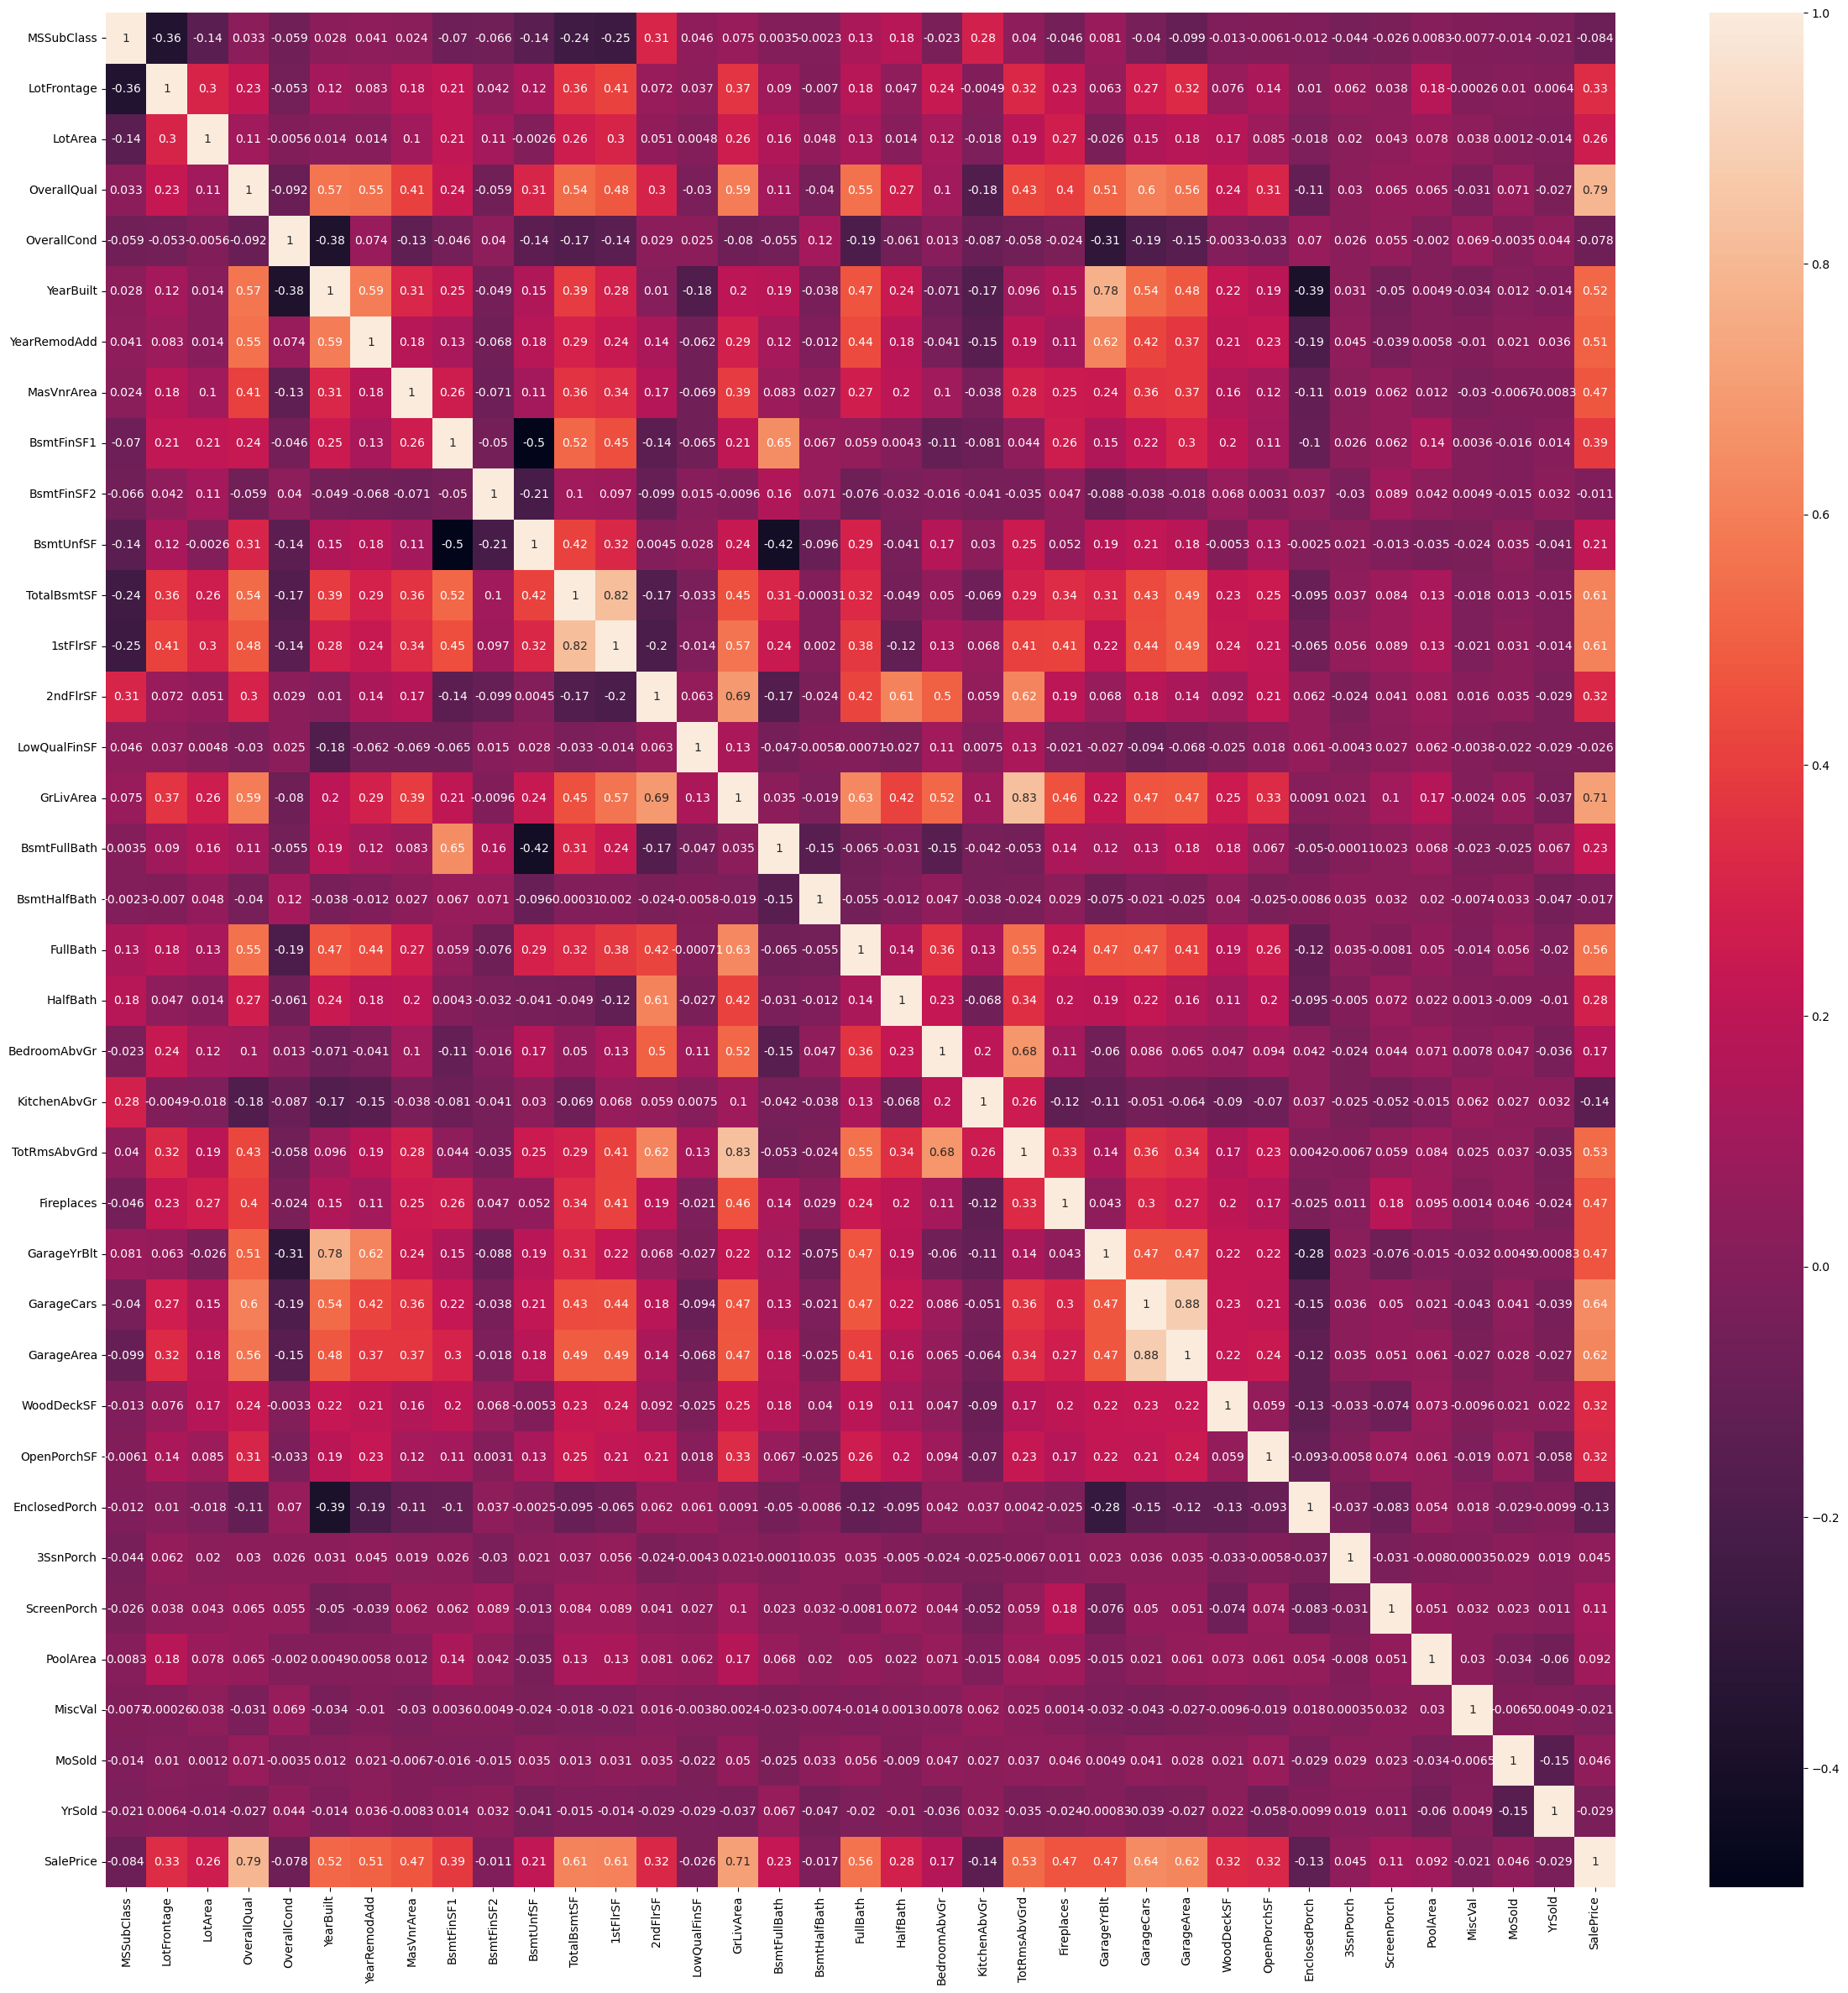

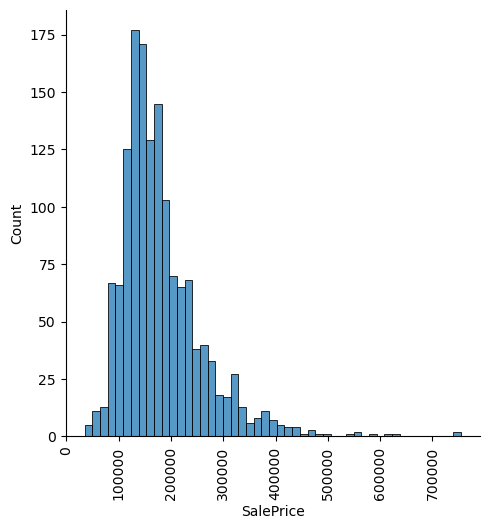

In [14]:
sns.displot(df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x1800 with 0 Axes>

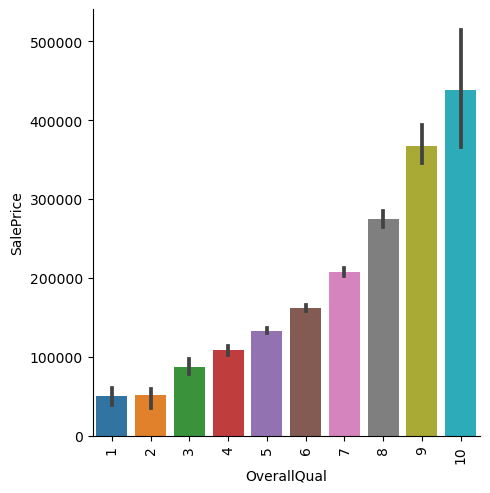

In [15]:
plt.figure(figsize=(20,18))
sns.catplot(data=df,x='OverallQual',y='SalePrice',kind='bar')
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x1800 with 0 Axes>

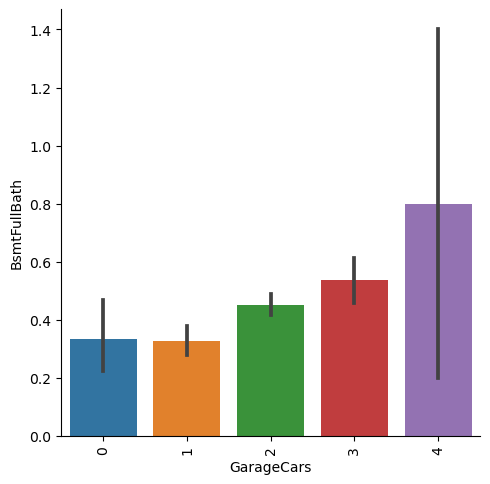

In [16]:
plt.figure(figsize=(20,18))
sns.catplot(data=df,x='GarageCars',y='BsmtFullBath',kind='bar')
plt.xticks(rotation=90)
plt.show()

In [17]:
num_wo_cat=df.drop(['BsmtFullBath','BsmtHalfBath','HalfBath','Fireplaces',
                    'MoSold','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath',
                    'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces',
                    'GarageCars','MoSold','YrSold','TotRmsAbvGrd'],axis=1)

### Outlier Analysis

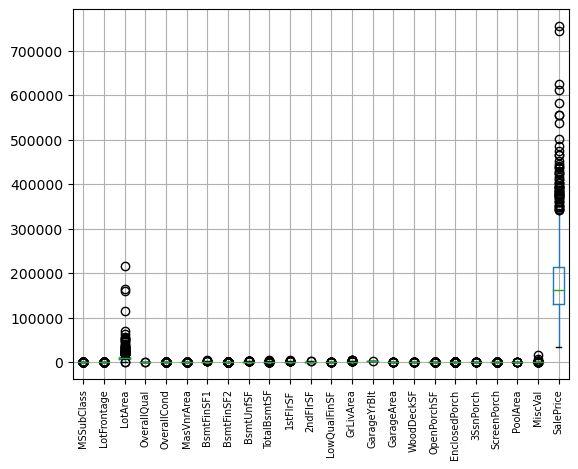

In [26]:
# excluding the columns which are categoricals as outlier concept is not applicable
num_wo_cat.boxplot()
plt.xticks(rotation=90,fontsize=7)
plt.show()

In [27]:
# Checking for the skewness of variables
df.skew()

MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

### Outlier Treatment

In [28]:
# replacing 0's with 0.0001 for log transformation
df.replace(0,0.0001,inplace=True)

In [29]:
#Transforming all values using log method
for i in num_wo_cat.select_dtypes(include=[np.number]).columns:
    df[i]=np.log(df[i])

In [30]:
df.skew()
#as our aim is not to treat the entire outliers we are treating to an extent and letting the model deal the remaining outliers

MSSubClass        0.232511
LotFrontage      -0.909115
LotArea          -0.137994
OverallQual      -0.929781
OverallCond      -0.636731
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        0.406171
BsmtFinSF1       -0.742308
BsmtFinSF2        2.441271
BsmtUnfSF        -2.893304
TotalBsmtSF      -5.862965
1stFlrSF          0.079157
2ndFlrSF          0.276855
LowQualFinSF      7.324509
GrLivArea        -0.006995
BsmtFullBath      0.596121
BsmtHalfBath      4.103458
FullBath          0.036586
HalfBath          0.675933
BedroomAbvGr      0.211808
KitchenAbvGr      4.488437
TotRmsAbvGrd      0.676341
Fireplaces        0.649680
GarageYrBlt      -0.701951
GarageCars       -0.342464
GarageArea       -3.817336
WoodDeckSF        0.094629
OpenPorchSF      -0.184235
EnclosedPorch     2.056498
3SsnPorch         7.631598
ScreenPorch       3.118271
PoolArea         14.354413
MiscVal           5.042533
MoSold            0.212053
YrSold            0.096269
SalePrice         0.121335
d

#### Encoding the categorical variables

In [31]:
# Selecting only the object columns
obj_cols=df.select_dtypes(object)

In [32]:
# As Linear model doesn't allows object variables we are encoding those using TargetEncoder
te=TargetEncoder()
for col in obj_cols:
    df[col]=te.fit_transform(df[col],df['SalePrice'])

In [33]:
#Ensuring all the variables are encoded
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,12.085885,4.174387,9.041922,12.025522,11.936094,12.022694,12.024183,12.001900,12.020565,12.163641,12.042916,12.025895,12.047512,12.182686,1.945910,1.609438,2003,2003,11.9842,12.019216,12.205873,12.209631,12.163630,5.278115,12.311282,12.043078,12.261665,12.179882,12.028536,11.939963,12.301937,6.559615,12.029436,-9.21034,5.010635,6.752270,12.032078,12.207626,12.06109,12.06144,6.752270,6.749931,-9.21034,7.444249,1.0000,0.0001,2.0,1.0000,3.0,1.0,12.222337,8,12.038511,0.0001,11.967877,12.103805,7.602401,12.172672,2.0,6.306275,12.034983,12.037173,12.059895,-9.210340,4.110874,-9.21034,-9.21034,-9.21034,-9.21034,-9.21034,2,2008,11.991061,12.005034,12.247694
1,2.995732,12.085885,4.382027,9.169518,12.025522,11.936094,12.022694,12.024183,12.034068,12.020565,12.116583,11.818794,12.025895,12.047512,11.993683,1.791759,2.079442,1976,1976,11.9842,12.019216,11.859767,11.862286,11.896884,-9.210340,11.837985,12.043078,11.870080,12.179882,12.028536,12.364355,11.953313,6.885510,12.029436,-9.21034,5.648974,7.140453,12.032078,12.207626,12.06109,12.06144,7.140453,-9.210340,-9.21034,7.140453,0.0001,1.0000,2.0,0.0001,3.0,1.0,11.810592,6,12.038511,1.0000,12.186416,12.103805,7.588830,12.172672,2.0,6.131226,12.034983,12.037173,12.059895,5.697093,-9.210340,-9.21034,-9.21034,-9.21034,-9.21034,-9.21034,5,2007,11.991061,12.005034,12.109011
2,4.094345,12.085885,4.219508,9.328123,12.025522,12.163465,12.022694,12.024183,12.001900,12.020565,12.163641,12.042916,12.025895,12.047512,12.182686,1.945910,1.609438,2001,2002,11.9842,12.019216,12.205873,12.209631,12.163630,5.087596,12.311282,12.043078,12.261665,12.179882,12.028536,12.094814,12.301937,6.186209,12.029436,-9.21034,6.073045,6.824374,12.032078,12.207626,12.06109,12.06144,6.824374,6.763885,-9.21034,7.487734,1.0000,0.0001,2.0,1.0000,3.0,1.0,12.222337,6,12.038511,1.0000,12.186416,12.103805,7.601402,12.172672,2.0,6.410175,12.034983,12.037173,12.059895,-9.210340,3.737670,-9.21034,-9.21034,-9.21034,-9.21034,-9.21034,9,2008,11.991061,12.005034,12.317167


In [34]:
df.dtypes

MSSubClass       float64
MSZoning         float64
LotFrontage      float64
LotArea          float64
Street           float64
LotShape         float64
LandContour      float64
Utilities        float64
LotConfig        float64
LandSlope        float64
Neighborhood     float64
Condition1       float64
Condition2       float64
BldgType         float64
HouseStyle       float64
OverallQual      float64
OverallCond      float64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle        float64
RoofMatl         float64
Exterior1st      float64
Exterior2nd      float64
MasVnrType       float64
MasVnrArea       float64
ExterQual        float64
ExterCond        float64
Foundation       float64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinSF1       float64
BsmtFinType2     float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating          float64
HeatingQC        float64
CentralAir       float64


#### Features and target variable splitting

In [35]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

#### Train and Test data Splitting

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=123,test_size=0.2)

In [37]:
# Checking the shape of the data
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1168, 75)
(292, 75)
(1168,)
(292,)


## Linear regression Modelling

In [38]:
#Fitting the model with the xtrain and ytrain
LR=LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [39]:
pred_train_lr=LR.predict(xtrain)
pred_test_lr=LR.predict(xtest)

In [40]:
# User Defined function for evaluation metrics
def reg_metrics(actual,pred):
    r2=r2_score(actual,pred)
    mse=mean_squared_error(actual,pred)
    mae=mean_absolute_error(actual,pred)
    rmse=mean_squared_error(actual,pred,squared=False)
    rmsle=mean_squared_log_error(actual,pred)
    print('R^2 Error : ',round(r2,4))
    print('MSE  : ',round(mse,4))
    print('MAE  : ',round(mae,4))
    print('RMSE : ',round(rmse,4))
    print('RMSLE: ',round(rmsle,4),'\n')


In [41]:
reg_metrics(ytrain,pred_train_lr)
reg_metrics(ytest,pred_test_lr)

R^2 Error :  0.9094
MSE  :  0.0147
MAE  :  0.0838
RMSE :  0.1212
RMSLE:  0.0001 

R^2 Error :  0.9079
MSE  :  0.0137
MAE  :  0.0837
RMSE :  0.117
RMSLE:  0.0001 



## Lasso Regression

In [42]:
las=Lasso(alpha=0.3)
las.fit(xtrain,ytrain)
pred_train_las=las.predict(xtrain)
pred_test_las=las.predict(xtest)

In [43]:
reg_metrics(ytrain,pred_train_las)
reg_metrics(ytest,pred_test_las)

#The model's behaviour is too worst

R^2 Error :  0.4783
MSE  :  0.0846
MAE  :  0.2169
RMSE :  0.2909
RMSLE:  0.0005 

R^2 Error :  0.5177
MSE  :  0.0716
MAE  :  0.199
RMSE :  0.2676
RMSLE:  0.0004 



## Ridge Regression

In [44]:
Rid=Ridge(alpha=0.5,solver='svd')
Rid.fit(xtrain,ytrain)
pred_train_rid=Rid.predict(xtrain)
pred_test_rid=Rid.predict(xtest)

In [45]:
reg_metrics(ytrain,pred_train_rid)
reg_metrics(ytest,pred_test_rid)

R^2 Error :  0.907
MSE  :  0.0151
MAE  :  0.0846
RMSE :  0.1228
RMSLE:  0.0001 

R^2 Error :  0.9135
MSE  :  0.0128
MAE  :  0.0816
RMSE :  0.1133
RMSLE:  0.0001 



## Decision Tree Regression

In [46]:
dtree=DecisionTreeRegressor(max_depth=5,min_samples_split=6,min_samples_leaf=20)
dtree.fit(xtrain,ytrain)
pred_train_dtree=dtree.predict(xtrain)
pred_test_dtree=dtree.predict(xtest)
reg_metrics(ytrain,pred_train_dtree)
reg_metrics(ytest,pred_test_dtree)


R^2 Error :  0.8303
MSE  :  0.0275
MAE  :  0.1212
RMSE :  0.1659
RMSLE:  0.0002 

R^2 Error :  0.7801
MSE  :  0.0327
MAE  :  0.1369
RMSE :  0.1807
RMSLE:  0.0002 



## Random Forest Regression

In [47]:
rf=RandomForestRegressor(n_estimators=300,max_depth=7,min_samples_split=10,min_samples_leaf=15)
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
reg_metrics(ytrain,pred_train_rf)
reg_metrics(ytest,pred_test_rf)


R^2 Error :  0.8915
MSE  :  0.0176
MAE  :  0.0889
RMSE :  0.1326
RMSLE:  0.0001 

R^2 Error :  0.8614
MSE  :  0.0206
MAE  :  0.1014
RMSE :  0.1435
RMSLE:  0.0001 



## Gradient Boosting

In [48]:
gb=GradientBoostingRegressor(learning_rate=0.1,max_depth=2)
gb.fit(xtrain,ytrain)
pred_train_gb=gb.predict(xtrain)
pred_test_gb=gb.predict(xtest)
reg_metrics(ytrain,pred_train_gb)
reg_metrics(ytest,pred_test_gb)

R^2 Error :  0.9351
MSE  :  0.0105
MAE  :  0.0742
RMSE :  0.1026
RMSLE:  0.0001 

R^2 Error :  0.9162
MSE  :  0.0124
MAE  :  0.0826
RMSE :  0.1116
RMSLE:  0.0001 



## Extreme Gradient Boosting

In [49]:
xgb=xgboost.XGBRegressor()
xgb.fit(xtrain,ytrain)
pred_train_xgb=xgb.predict(xtrain)
pred_test_xgb=xgb.predict(xtest)
reg_metrics(ytrain,pred_train_xgb)
reg_metrics(ytest,pred_test_xgb)

R^2 Error :  0.9997
MSE  :  0.0001
MAE  :  0.0052
RMSE :  0.0075
RMSLE:  0.0 

R^2 Error :  0.8955
MSE  :  0.0155
MAE  :  0.0894
RMSE :  0.1246
RMSLE:  0.0001 



## Ada Boost

In [83]:
ada=AdaBoostRegressor(n_estimators=160,learning_rate=0.8)
ada.fit(xtrain,ytrain)
pred_train_ada=ada.predict(xtrain)
pred_test_ada=ada.predict(xtest)
reg_metrics(ytrain,pred_train_ada)
reg_metrics(ytest,pred_test_ada)

R^2 Error :  0.8698
MSE  :  0.0211
MAE  :  0.1182
RMSE :  0.1453
RMSLE:  0.0001 

R^2 Error :  0.815
MSE  :  0.0275
MAE  :  0.1237
RMSE :  0.1658
RMSLE:  0.0002 



## KNN

In [82]:
knn=KNeighborsRegressor(n_neighbors=17)
knn.fit(xtrain,ytrain)
pred_train_knn=knn.predict(xtrain)
pred_test_knn=knn.predict(xtest)
reg_metrics(ytrain,pred_train_knn)
reg_metrics(ytest,pred_test_knn)

R^2 Error :  0.6307
MSE  :  0.0599
MAE  :  0.1823
RMSE :  0.2447
RMSLE:  0.0004 

R^2 Error :  0.5876
MSE  :  0.0612
MAE  :  0.1763
RMSE :  0.2475
RMSLE:  0.0004 



## Support Vector Machine

In [78]:
svr=SVR(C=1.8,kernel='poly',degree=108)
svr.fit(xtrain,ytrain)
pred_train_svr=svr.predict(xtrain)
pred_test_svr=svr.predict(xtest)
reg_metrics(ytrain,pred_train_svr)
reg_metrics(ytest,pred_test_svr)

R^2 Error :  0.7732
MSE  :  0.0368
MAE  :  0.1224
RMSE :  0.1918
RMSLE:  0.0002 

R^2 Error :  0.8009
MSE  :  0.0296
MAE  :  0.1091
RMSE :  0.172
RMSLE:  0.0002 



<p> As s final result, aiming for the low bias and low variance model we can conclude <b>Gradient Boost</b> is the best model amongst all giving avaerage of r^2 value as <b>0.84</b> both.